#  3. Análise e exploração de dados

In [1]:
# importar dados
import pandas as pd

series = pd.read_excel('serie_hist.xlsx', index_col="data")
retornos = pd.read_excel('retorno_hist.xlsx', index_col="data")

### Visualização series temporais

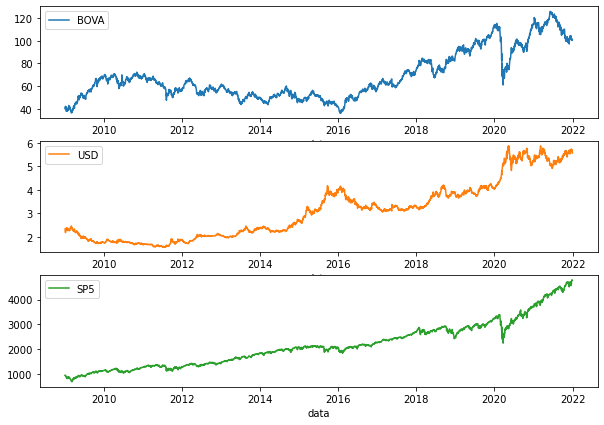

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

series.plot(figsize=(10,7), subplots=True, sharex=False)
plt.show()

<AxesSubplot:xlabel='data'>

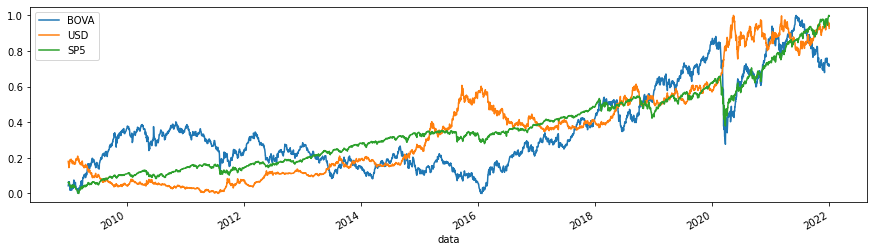

In [3]:
# Visualização series normalizadas
series_norm =(series-series.min())/(series.max()-series.min())
series_norm.plot(figsize=(15,4))

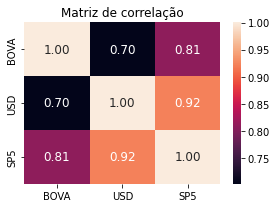

In [4]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(series.values)
cov_mat = np.cov(X_std.T)

cols = series.columns

plt.figure(figsize=(4,3))
hm = sns.heatmap(cov_mat,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Matriz de correlação')
plt.tight_layout()
plt.show()

### Visualização retornos

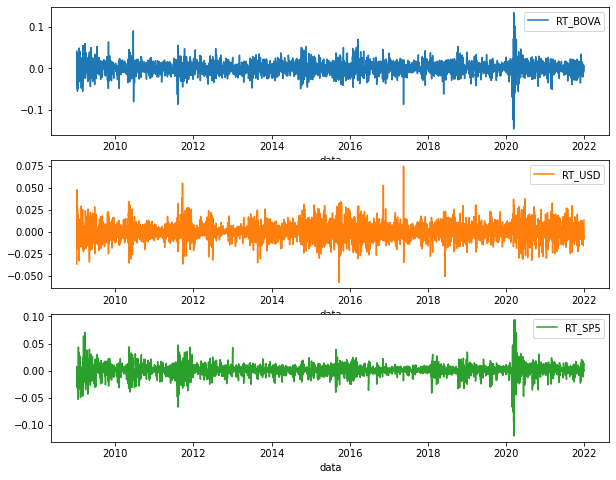

In [5]:
retornos.iloc[:,:-1].plot(figsize=(10,8), subplots=True, sharex=False)
plt.show()

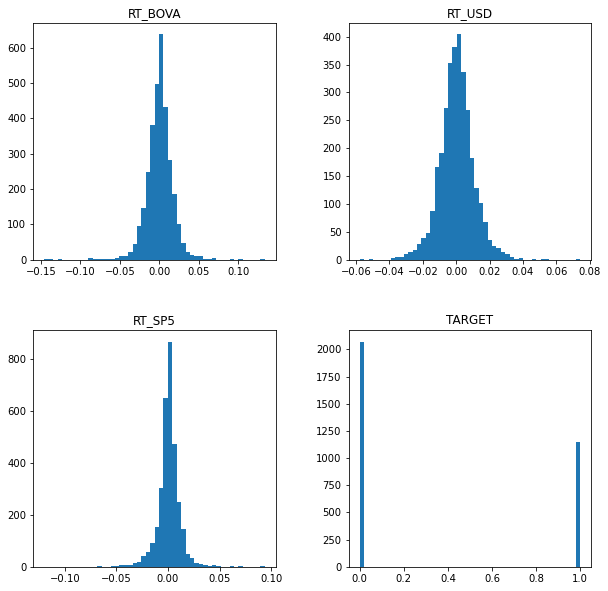

In [6]:
#retornos.iloc[:,:-1].hist(bins=50, figsize=(15,15), grid=False)
retornos.hist(bins=50, figsize=(10,10), grid=False)
plt.show()

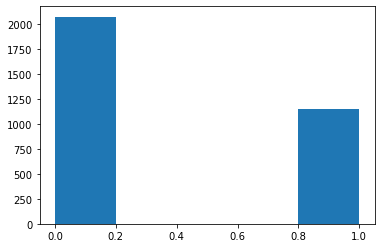

Positive Rate
0.5552873008208595


In [7]:
retornos["TARGET"].hist(bins=5, grid=False)
plt.show()

print("Positive Rate")
print(sum(retornos["TARGET"]==1)/sum(retornos["TARGET"]==0))

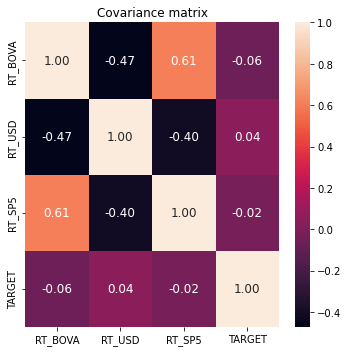

In [8]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(retornos.values)
cov_mat = np.cov(X_std.T)

cols = retornos.columns

plt.figure(figsize=(5,5))
hm = sns.heatmap(cov_mat,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix')
plt.tight_layout()
plt.show()

### Verificação de normalidade

RT_BOVA


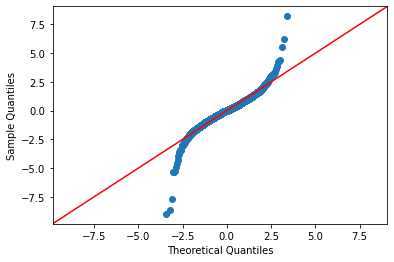

RT_USD


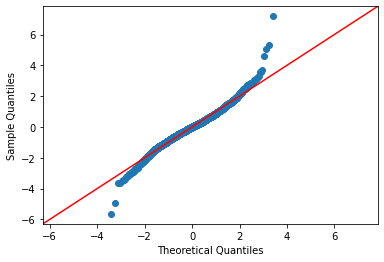

RT_SP5


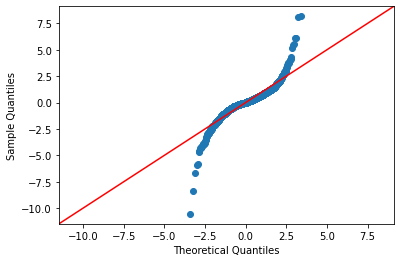

In [9]:
import statsmodels.api as sm
import pylab as py

stdsc = StandardScaler()
X_std = stdsc.fit_transform(retornos.iloc[:,:-1].values)

for i in [0,1,2]:
    print(cols[i]) 
    a = sm.qqplot(X_std[:,i], line ='45')
    retornos.iloc[:,:-1].values
    py.show()

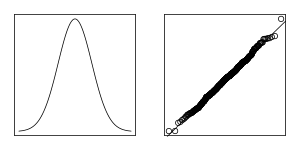

In [10]:
from IPython import display
display.Image("https://i0.wp.com/www.leg.ufpr.br/~walmes/ridiculas/f044.gif")

# https://ridiculas.wordpress.com/2012/11/30/como-fazer-e-interpretar-o-grafico-quantil-quantil/

In [11]:
preditores = retornos.iloc[:,:-1].copy()
media = np.mean(preditores)
desvio = np.std(preditores)

normalizado = (preditores-media)/desvio

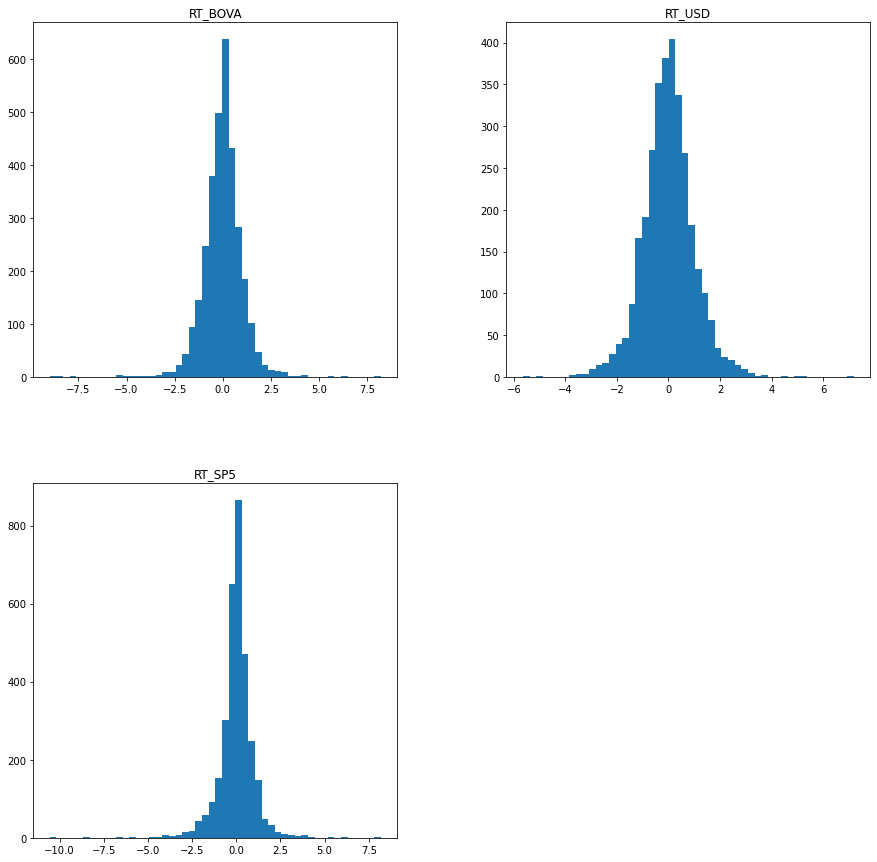

In [12]:
normalizado.hist(bins=50, figsize=(15,15), grid=False)
plt.show()

In [13]:
from scipy.stats import kurtosis

norm_dist = np.random.normal(0, 1, 3000)

print("Curtose dados:", "\n",
kurtosis(normalizado))

print('\n',"Curtose distribuição normal:", "\n",
kurtosis(norm_dist))

Curtose dados: 
 [ 8.42647032  2.45349615 12.70107362]

 Curtose distribuição normal: 
 -0.037263619931175995
